
# Digit Classification with KNN


In [6]:

%matplotlib inline
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [7]:
import sklearn
sklearn.__version__

'0.24.1'

In [8]:

X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False,as_frame=False)
X = X / 255.0
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


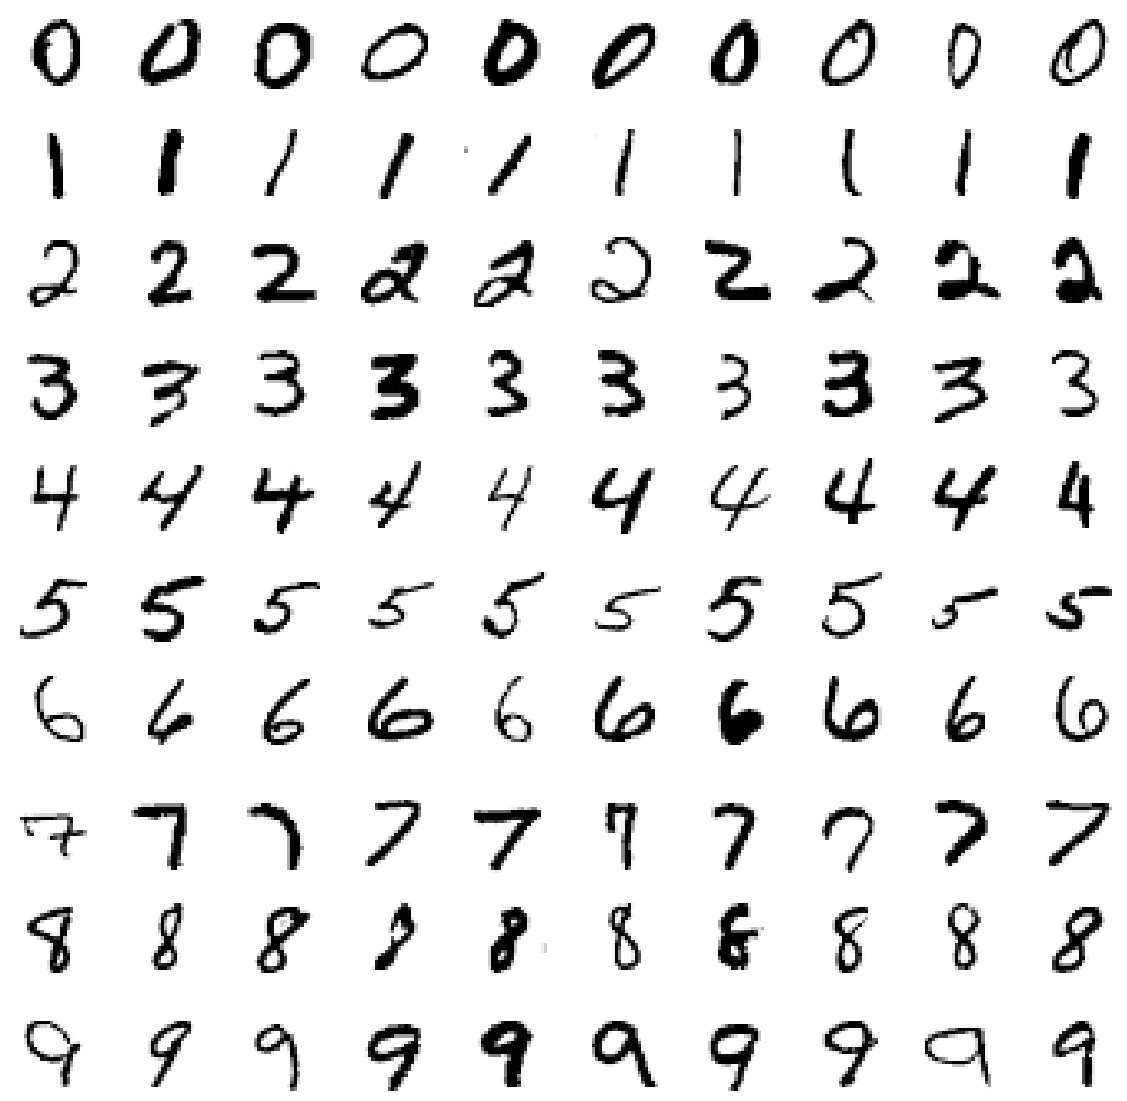

In [9]:
def Q1(num_examples=10):
    unique_digits = np.unique(Y)
    fig, axs = plt.subplots(len(unique_digits), num_examples, figsize=(20,20))
    for a,b in enumerate(unique_digits):
        for c in range(num_examples):
            axs[a,c].imshow(X[Y==b][c].reshape((int(np.sqrt(X.shape[1])),int(np.sqrt(X.shape[1])))),cmap='Greys')
            axs[a,c].axis('off')
Q1(10)

In [10]:
def Q2(k_values):

    kVals = k_values
    for k in kVals:
        model = KNeighborsClassifier(n_neighbors=k) #knn model for different values of k
        model.fit(mini_train_data, mini_train_labels) #training on mini train set as instructed
        dev_predicted_labels = model.predict(dev_data) #evaluate on dev set 
        score = accuracy_score(dev_labels, dev_predicted_labels, normalize=True) #scoring 
        if k == 1: 
            print(classification_report(dev_labels,dev_predicted_labels)) #if k=1 then print classification report
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))

k_values = [1, 3, 5, 7, 9]
Q2(k_values)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

k=1, accuracy=88.40%
k=3, accuracy=87.60%
k=5, accuracy=88.20%
k=7, accuracy=87.70%
k=9, accuracy=87.50%


### ExaminingTraining size

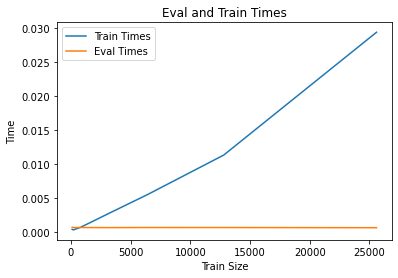

,Train Size,Accuracy %,Train Time,Eval Time
0,100,70.2,0.000373,0.000683
1,200,79.1,0.000291,0.000650
2,400,81.1,0.000421,0.000630
3,800,86.6,0.000676,0.000645
4,1600,90.5,0.001358,0.000637
5,3200,92.7,0.002744,0.000628
6,6400,93.9,0.005480,0.000644
7,12800,95.2,0.011306,0.000641
8,25600,96.3,0.029374,0.000614


In [11]:
def Q3(train_sizes, accuracies,train_times=[],eval_times=[]):

    for x in train_sizes:
        k=1
        train_data2, train_labels2 = X[:x], Y[:x] #training on varied dataset sizes
        model = KNeighborsClassifier(n_neighbors=1) 
        starttrain=time.time() #start time for train
        model.fit(train_data2, train_labels2) #train model using varied size of train data
        endtrain=time.time() #end time for train
        test_predicted_labels = model.predict(dev_data) 
        starteval=time.time() #start time needed for calculating accuracy
        score = accuracy_score(dev_labels, test_predicted_labels, normalize=True) 
        endeval=time.time() #end time needed for calculating accuracy
        accuracies.append((score*100)) 
        train_time=endtrain-starttrain #calculate train time 
        eval_time=endeval-starteval #calculate eval accuracy time
        train_times.append(train_time) 
        eval_times.append(eval_time)
    df = pd.DataFrame()
    df['Train Size'] = train_sizes
    df['Accuracy %'] = accuracies
    df['Train Time'] = train_times
    df['Eval Time'] = eval_times #inputed all data to display in dataframe including accuracy, train_sizes, train_times, and eval_times
    plt.plot(train_sizes,train_times,label="Train Times")
    plt.plot(train_sizes,eval_times,label="Eval Times")
    plt.legend()
    plt.title('Eval and Train Times')
    plt.xlabel('Train Size')
    plt.ylabel('Time')
    plt.show() #plotting data with labels and axis  
    return(df)

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
train_times = []
eval_times = []
Q3(train_sizes, accuracies, train_times, eval_times)

   Train Size           Accuracy %
0       60000  [87.77188087750423]
1      120000  [92.05193296123416]
2     1000000   [100.612037128694]

R^2 Value:
0.4177006634161019


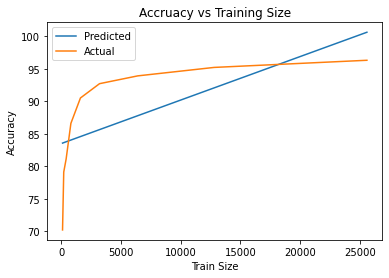

   Train Size  Accuracy %
0       60000   92.454370
1      120000   92.651471
2     1000000   92.750033

R^2 Value After Transformation:
0.8904873087263137


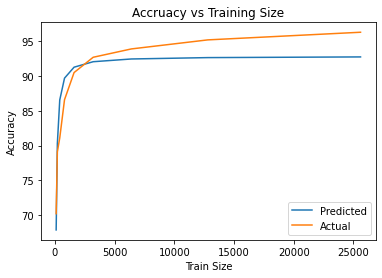

In [12]:
def Q4():

    regression_model = LinearRegression() #linear regression
    train_sizes2 = np.array(train_sizes).reshape(-1,1) #train data array needs to be reshaped
    accuracies2 = np.array(accuracies).reshape(-1,1) #accuracies from last problem needs to be reshaped
    regression_model.fit(train_sizes2, accuracies2) #fitting model using these reshaped arrays
    y_predicted = regression_model.predict(train_sizes2) #predicting
    q4_sizes = []
    q4_accuracies = []
    for a1, a2 in zip( [60000,120000,1000000], y_predicted[len(y_predicted)-3:]): #only for the printed values requested
        q4_sizes.append(a1)
        q4_accuracies.append(a2)
    df1 = pd.DataFrame() #creating dataframe for printable values
    df1['Train Size'] =q4_sizes
    df1['Accuracy %'] = q4_accuracies
    print(df1) #printing dataframe w/ 60k,120k,1m, and accuracies related
    print("\nR^2 Value:") 
    print(str(regression_model.score(train_sizes2, accuracies2))) #printing the r^2 value 
    plt.plot(train_sizes,y_predicted,label="Predicted") 
    plt.plot(train_sizes,accuracies2,label="Actual")
    plt.legend()
    plt.title('Accruacy vs Training Size')
    plt.xlabel('Train Size')
    plt.ylabel('Accuracy') 
    plt.show() #plotting this data on same graph before transformation
    prob_to_odds = lambda x: x / (1.0 - x)  # [0,1] -> [0, inf]
    odds_to_prob = lambda x: x / (1.0 + x)  # [0, inf] -> [0, 1] #from the slack channel 
    new_train_sizes=[]
    for x in train_sizes:
        new_train_sizes.append(odds_to_prob(x)) #applying odds to prob transformation from class slack channel 
    newtrain_sizes2 = np.array(new_train_sizes).reshape(-1,1) #reshaping array
    regression_model.fit(newtrain_sizes2, accuracies) #fitting
    y_predicted2 = regression_model.predict(newtrain_sizes2) #predicting
    q4_sizes2 = []
    q4_accuracies2 = []
    for a1, a2 in zip( [60000,120000,1000000], y_predicted2[len(y_predicted2)-3:]):
        q4_sizes2.append(a1)
        q4_accuracies2.append(a2) #running the predictions post transformation just like above, but with transformed 60k, 120k, 1m
    df2 = pd.DataFrame()
    df2['Train Size'] =q4_sizes2
    df2['Accuracy %'] = q4_accuracies2
    print(df2) #printing this data in a dataframe 
    print("\nR^2 Value After Transformation:")
    print(str(regression_model.score(newtrain_sizes2, accuracies2))) #r^2 value post transformation
    plt.plot(train_sizes,y_predicted2,label="Predicted") 
    plt.plot(train_sizes,accuracies,label="Actual")
    plt.legend()
    plt.title('Accruacy vs Training Size')
    plt.xlabel('Train Size')
    plt.ylabel('Accuracy')
    plt.show() #plotting transformed data on same graph, this with transformations


Q4()

### Confusion Matrix


[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


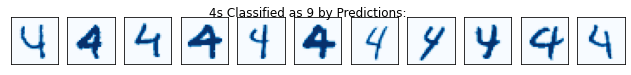

In [13]:
def Q5():

### STUDENT START ###
    model = KNeighborsClassifier(n_neighbors=1) #creating model
    model.fit(mini_train_data, mini_train_labels) #training on mini
    test_predicted_labels = model.predict(dev_data) #evaluating on dev
    print(confusion_matrix(dev_labels,test_predicted_labels)) #printing confusion matrix
    fig, ax = plt.subplots(1, 11, figsize = (11, 1))
    plt.setp(ax, xticks=(), yticks=())
    fig.suptitle("4s Classified as 9 by Predictions:")
    #confusion matrix shows 11 4s misclassified as 9s, print this
    wrongs = np.where((test_predicted_labels== str(9))&(dev_labels==str(4)))[0][:11] #printing most misclassified values
    b=0
    for a in wrongs:
        ax[b].imshow(np.reshape(dev_data[a], (28, 28)), cmap='Blues') #plotting the incorrect ones all 11 as shown in matrix
        b += 1
    
### STUDENT END ###

Q5()
